***Hi, This is my first kernel . I tired using different Machine Learning models.***

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [2]:
credit = pd.read_csv("../input/creditcard.csv")

In [3]:
credit.head()

In [4]:
credit.describe()

In [5]:
credit.info()

In [6]:
credit.shape

In [7]:
credit.plot(figsize=(20, 8))
plt.show()

In [8]:
import seaborn as sns
sns.countplot(x = "Class", data = credit)
credit.loc[:, 'Class'].value_counts()

In [9]:
V_col = credit[['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28']]
V_col.head()

In [10]:
V_col.hist(figsize=(30, 20))
plt.show()

In [ ]:
no_of_normal_transcations = len(credit[credit['Class']==1])
no_of_fraud_transcations = len(credit[credit['Class']==0])
print("no_of_normal_transcations:",no_of_normal_transcations)
print("no_of_fraud_transcations:", no_of_fraud_transcations)

In [ ]:
X = credit.iloc[:, 1:29].values
y = credit.iloc[:, 30].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print ("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

***KNN Classification***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors = 17)
X,y = credit.loc[:,credit.columns != 'Class'], credit.loc[:,'Class']
knc.fit(X_train,y_train)
y_knc = knc.predict(X_test)
print('accuracy of training set: {:.4f}'.format(knc.score(X_train,y_train)))
print('accuracy of test set: {:.4f}'.format(knc.score(X_test, y_test)))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, precision_recall_curve
print('confusion_matrix of KNN: ', confusion_matrix(y_test, y_knc))
print('precision_score of KNN: ', precision_score(y_test, y_knc))
print('recall_score of KNN: ', recall_score(y_test, y_knc))
print('precision_recall_curve: ', precision_recall_curve(y_test, y_knc))

**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 20, random_state = 0)
reg.fit(X_train,y_train)

In [ ]:
y_rfr = reg.predict(X_test)

In [ ]:
reg.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(reg.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(reg.score(X_test, y_test)))

**Decision Tree Regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regs = DecisionTreeRegressor(random_state = 0)
regs.fit(X_train, y_train)

In [ ]:
y_dtr = regs.predict(X_test)

In [ ]:
regs.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(regs.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(regs.score(X_test, y_test)))

In [ ]:
print('accuracy_score of decision tree regression: ', accuracy_score( y_dtr , y_test))
print('confusion_matrix of decision tree regression: ', confusion_matrix(y_dtr, y_test))
print('precision_score of decision tree regression: ', precision_score( y_dtr, y_test))
print('recall_score of decision tree regression: ', recall_score( y_dtr, y_test))
print('precision_recall_curve: ', precision_recall_curve(y_dtr, y_test))

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, y_train)

In [ ]:
y_lr = logreg.predict(X_test)

In [ ]:
logreg.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
print('accuracy_score of logistic regression : ', accuracy_score(y_test, y_lr))
print('confusion_matrix of logistic regression: ', confusion_matrix(y_test, y_lr))
print('precision_score of logistic regression: ', precision_score(y_test, y_lr))
print('recall_score of logistic regression: ', recall_score(y_test, y_lr))
print('precision_recall_curve: ', precision_recall_curve(y_test, y_lr))

In [ ]:
logreg100 = LogisticRegression(random_state = 1000, C =100)
logreg100.fit(X_train, y_train)

In [ ]:
y_lr100 = logreg100.predict(X_test)

In [ ]:
logreg100.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg100.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg100.score(X_test, y_test)))

In [ ]:
logreg01 = LogisticRegression(random_state = 0, C =0.001)
logreg01.fit(X_train, y_train)

In [ ]:
y_p01 = logreg01.predict(X_test)

In [ ]:
logreg01.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(logreg01.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(logreg01.score(X_test, y_test)))

 **Try* using this coding in your jupyter notebook as in kaggle "mglearn" is unavailable. ***
 **Use code as
 import mglearn
 mglearn.plots.plot_linear_regression_wave()**

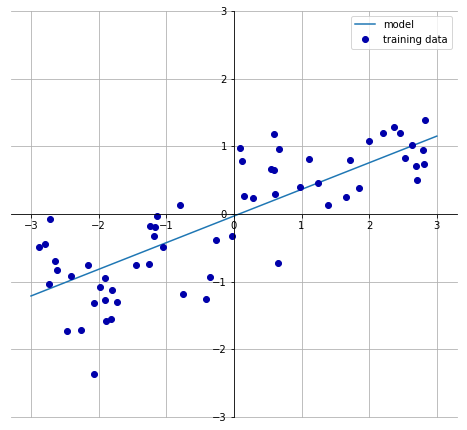

**For plotting the graph:**

plt.plot(logreg.coef_.T, 'o', label = 'C=1')
plt.plot(logreg100.coef_.T, '^', label = 'C=100')
plt.plot(logreg01.coef_.T,'v', label = 'C=0.01')
plt.xticks(range(credit.shape[1]),V_col, rotation = 90)
plt.hlines(0, 0, credit.shape[1])
plt.xlabel('coeff Index')
plt.ylabel('coeff frequency')
plt.legend()

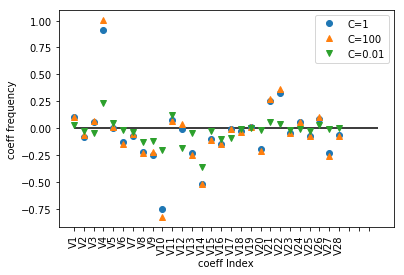

**Decision Tree Classification**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [ ]:
y_dtc = classifier.predict(X_test)

In [ ]:
classifier.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
classifier = DecisionTreeClassifier(max_depth = 4, random_state = 42)
classifier.fit(X_train,y_train)
print('accuracy of training set: {:.4f}'.format(classifier.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(classifier.score(X_test, y_test)))

In [ ]:
print('accuracy_score of decesion tree classifier: ', accuracy_score(y_dtc, y_test))
print('confusion_matrix of decision tree classifier: ', confusion_matrix(y_dtc, y_test))
print('precision_score of decision tree classifier: ', precision_score(y_dtc, y_test))
print('recall_score of decision tree classifier: ', recall_score(y_dtc, y_test))
print('precision_recall_curve of decision tree classifier: ', precision_recall_curve(y_dtc, y_test))

**Naive Bayes Classification**

In [ ]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)

In [ ]:
y_nb = NBC.predict(X_test)

In [ ]:
NBC.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(NBC.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(NBC.score(X_test, y_test)))

In [ ]:
print('accuracy_score of Naive Bayes: ', accuracy_score(y_test, y_nb))
print('confusion_matrix of Naive Bayes: ', confusion_matrix(y_test, y_nb))
print('precision_score of Naive Bayes: ', precision_score(y_test, y_nb))
print('recall_score of Naive Bayes: ', recall_score(y_test, y_nb))
print('precision_recall_curve of Naive Bayes: ', precision_recall_curve(y_test, y_nb))

**Extreme Gradient Boost Classification**

In [ ]:
from xgboost import XGBClassifier
XGBC= XGBClassifier()
XGBC.fit(X_train, y_train)

In [ ]:
y_xgbc = XGBC.predict(X_test)

In [ ]:
XGBC.score(X_test, y_test)
print('accuracy of training set: {:.4f}'.format(XGBC.score(X_train,y_train)))
print('accuaracy of test set: {:.4f}'.format(XGBC.score(X_test, y_test)))

In [ ]:
print('accuracy_score of xgboost: ', accuracy_score(y_test, y_xgbc))
print('confusion_matrix of xgboost: ', confusion_matrix(y_test, y_xgbc))
print('precision_score of xgboost: ', precision_score(y_test, y_xgbc))
print('recall_score of xgboost: ', recall_score(y_test, y_xgbc))
print('precision_recall_curve of Naive Bayes: ', precision_recall_curve(y_test, y_nb))

**Thanks for reading this.
Still trying to improvise my kernel, give suggestions to improve it.
If you like this support me by voting .**